In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM
%matplotlib inline

In [2]:
df = pd.read_csv('../Data/AirPassengers.csv')
df.head()

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index(['Month'], drop=True)
df.head(10)

,AirPassengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


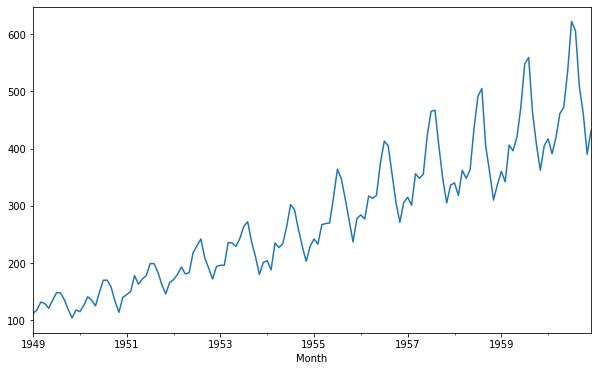

In [5]:
plt.figure(figsize=(10, 6))
df['AirPassengers'].plot();

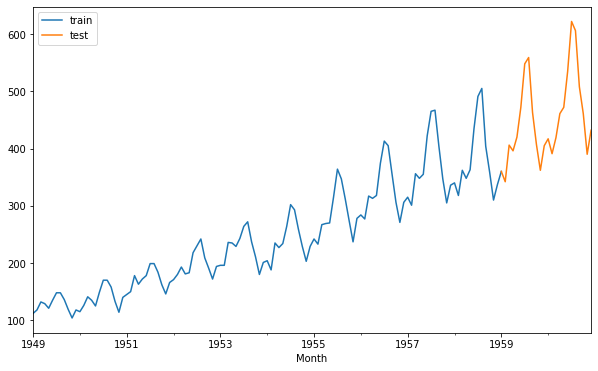

In [6]:
split_date = pd.Timestamp('1959-01-01')
df =  df['AirPassengers']
train = df.loc[:split_date]
test = df.loc[split_date:]
plt.figure(figsize=(10, 6))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

In [7]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train.values.reshape(-1,1))
test_sc = scaler.transform(test.values.reshape(-1,1))

In [11]:
predict_days = 1
X_train = train_sc[:-predict_days]
y_train = train_sc[predict_days:]

X_test = test_sc[:-predict_days]
y_test = test_sc[predict_days:]

In [8]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [12]:
nn_model.compile(loss='mean_squared_error', optimizer='adam   k')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)


Epoch 1/100
120/120 [==============================] - 0s 2ms/step - loss: 0.1561
Epoch 2/100
120/120 [==============================] - 0s 672us/step - loss: 0.0893
Epoch 3/100
120/120 [==============================] - 0s 690us/step - loss: 0.0540
Epoch 4/100
120/120 [==============================] - 0s 682us/step - loss: 0.0394
Epoch 5/100
120/120 [==============================] - 0s 725us/step - loss: 0.0334

In [13]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.913
The R2 score on the Test set is:	0.464


In [61]:
y_pred_test_nn_s = pd.DataFrame(scaler.inverse_transform(y_pred_test_nn))
y_train_pred_nn_s = scaler.inverse_transform(y_train_pred_nn)
y_test_s = pd.DataFrame(scaler.inverse_transform(y_test))

2909.889275622635


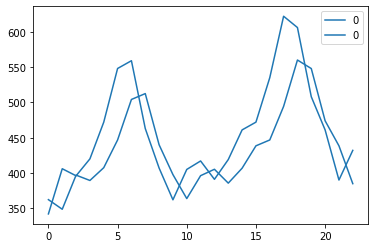

In [68]:
sns.lineplot(data=y_test_s)
sns.lineplot(data=y_pred_test_nn_s)
print(mean_squared_error(y_test_s, y_pred_test_nn_s))
